<a href="https://colab.research.google.com/github/abhich2507/PHYS231/blob/main/PDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

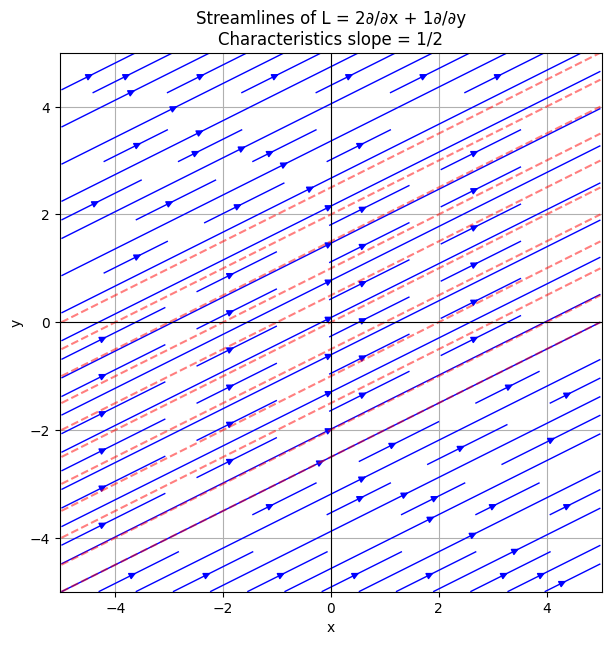

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (you can change these)
a = 2
b = 1

# Create a grid
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

# Define constant vector field (direction of characteristics)
U = a * np.ones_like(X)
V = b * np.ones_like(Y)

# Plot streamlines
plt.figure(figsize=(7,7))
plt.streamplot(X, Y, U, V, color='blue', linewidth=1, arrowsize=1)

# Add a few straight lines of constant t = bx - ay (characteristics)
for C in np.linspace(-5, 5, 11):
    y_line = (b*X[0,:] - C) / a   # solve bx - ay = C for y
    plt.plot(X[0,:], y_line, 'r--', alpha=0.5)

# Formatting
plt.axhline(0, color='k', lw=0.8)
plt.axvline(0, color='k', lw=0.8)
plt.title(f"Streamlines of L = {a}∂/∂x + {b}∂/∂y\nCharacteristics slope = {b}/{a}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis("equal")
plt.show()


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import time

# Detect device
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print("Running on TPU:", tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    # Default to GPU/CPU
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        print("Running on GPU")
        strategy = tf.distribute.MirroredStrategy()
    else:
        print("Running on CPU")
        strategy = tf.distribute.get_strategy()

print("Number of replicas:", strategy.num_replicas_in_sync)

# Load dataset
(ds_train, ds_test), ds_info = tfds.load(
    "mnist",
    split=["train", "test"],
    as_supervised=True,
    with_info=True,
)

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

BATCH_SIZE = 128 * strategy.num_replicas_in_sync
ds_train = ds_train.map(preprocess).cache().shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

# Build model inside strategy
with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

# Train & time it
start = time.time()
history = model.fit(ds_train, epochs=5, validation_data=ds_test)
print("Training time:", time.time() - start, "seconds")


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


Running on CPU
Number of replicas: 1


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.7VBYP3_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.7VBYP3_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8606 - loss: 0.4782 - val_accuracy: 0.9807 - val_loss: 0.0615
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9806 - loss: 0.0644 - val_accuracy: 0.9799 - val_loss: 0.0563
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9864 - loss: 0.0433 - val_accuracy: 0.9863 - val_loss: 0.0379
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9894 - loss: 0.0345 - val_accuracy: 0.9879 - val_loss: 0.0336
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9919 - loss: 0.0263 - val_accuracy: 0.9914 - val_loss: 0.0263
Training time: 24.045488119125366 seconds


After installing the libraries, you can run the next cell to execute the code.